In [22]:
import pandas as pd
import numpy as np

In [23]:
data=pd.read_csv(r"C:\Users\USER\Desktop\건우\fat_predict_project\data\public_health_data_csv\data_set.csv")

# 1. 빠른 1차 성능파악을 위해 결측치를 모두 제거

In [24]:
sampled_data=data.dropna()

In [25]:
len(sampled_data)

8969

# 2. 경향을 보기 위해 정상, 과체중, 비만을 모두 같은 개수만큼 샘플링

In [26]:
# sampled_data에서 'fat' 열 값에 따라 그룹화하여 데이터프레임 생성
grouped = sampled_data.groupby('fat')

# 비율이 1:1:1이 되도록 각 그룹 중 최소개수만큼 각각의 그룹에서 샘플링
sampled_data = grouped.apply(lambda x: x.sample(n=min(len(x), sampled_data['fat'].value_counts().min())))

In [27]:
len(sampled_data)

4131

# 3. fat비율에 맞춰서 같은 개수로 샘플링한 데이터셋을 csv 파일로 만듦

In [28]:
# sampled_data.to_csv("profiling용.csv", index=False)

# 4. 13개의 데이터프레임으로 분할

- pandas_profiling으로 대략적인 분포 확인
- seaborn을 이용하여 target값인 fat에 따른 고유값 비율 시각화

In [29]:
# 전체 열 개수
num_cols=sampled_data.shape[1]
# 분할할 열 개수
size=10

#쪼개진 data프레임을 저장할 리스트
data_frames=[]

k=0
for i in range(0,num_cols, size):
    split=sampled_data.iloc[:, i:i+size]
    data_frames.append(split)
    k+=1
print("쪼개진 개수:", k)

쪼개진 개수: 13


In [30]:
# k=0
# for i in data_frames:
#     pr=i.profile_report()
#     pr.to_file(f'./pr_report{k}.html')
#     k+=1

In [31]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# for i in data_frames:
#     colums=i.columns
#     for k in range(len(i.columns)):
#         sns.countplot(x=colums[k], hue='fat', data=sampled_data)
#         plt.legend(loc='upper right', title='fat')
#         plt.show()

# 5. 문제점 발견!

특성의 고유값마다 fat의 값(정상, 과체중, 비만) 비율이 비슷한 컬럼이 대다수

###### 밑이 그 예시

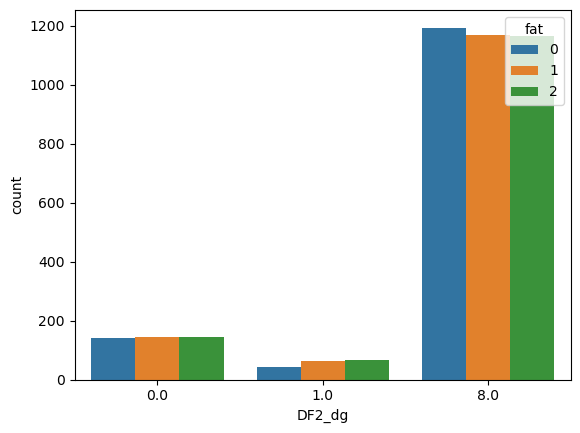

In [32]:
'DF2_dg'

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='DF2_dg', hue='fat', data=sampled_data)
plt.legend(loc='upper right', title='fat')
plt.show()